<a href="https://colab.research.google.com/github/vishnubanna/stocktrader/blob/master/stock_analysis_trials2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import requests

import time
import datetime as dt
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
#from mpl_finance import candlestick_ohlc

from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
from pandas_datareader import data as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import io

import fix_yahoo_finance as yf
from matplotlib import style


4/UwHMnDMoUr9NrYIUWmTvwWQA8bR24Kyl0GT3xlL25VHyBPgG2_Zh10E

TSLA
                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2018-01-16  345.000000  334.799988  337.540009  340.059998  6474300  340.059998
2018-01-17  349.000000  339.750000  340.470001  347.160004  7083700  347.160004
2018-01-18  352.299988  343.739990  345.670013  344.570007  5685800  344.570007
2018-01-19  350.589996  342.600006  345.000000  350.019989  4888300  350.019989
2018-01-22  357.829987  349.200012  349.399994  351.559998  6210400  351.559998
False
                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2018-01-16  345.000000  334.799988  337.540009  340.059998  6474300  340.059998
2018-01-17  349.000000  339.750000  340.470001  347.160004  7083700  347.160004
2018-01-18  352.299988  343.739990  345.670013  344.570007  5685800  344.570007
2018-01-19  350.589996  342.6

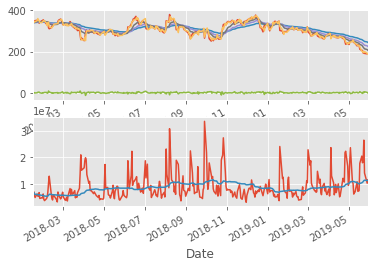

In [0]:
# import pandas as pd
# import numpy as np
# import os
# import datetime as dt
# from pandas_datareader import data as pdr
# import tensorflow as tf
# import matplotlib.pyplot as plt

# from sklearn import preprocessing, svm
# from sklearn.model_selection import cross_validate, train_test_split
# from sklearn.linear_model import LinearRegression

# import datetime

style.use('ggplot')

def getData2(ticker, tsfunc = 1, tlen = '1', FoC = 'full'):
    #FoC = full or compact
    apikey = '9OWLY1IEBT5CH6I8'
    intraday = '&interval='+tlen+'min&'
    if tsfunc == 1:
        tssfunc = 'TIME_SERIES_DAILY'
        url = 'https://www.alphavantage.co/query?function=' + tssfunc + '&symbol='+ ticker +'&outputsize='+FoC+'&apikey=' + apikey +'&datatype=csv'
    elif tsfunc == 2:
        tssfunc = 'TIME_SERIES_INTRADAY'
        url = 'https://www.alphavantage.co/query?function=' + tssfunc + '&symbol='+ ticker + intraday + '&outputsize='+FoC+'&apikey=' + apikey +'&datatype=csv'

    csv = requests.get(url).content
    df = pd.read_csv(io.StringIO(csv.decode('utf-8')))
    df.rename(columns = {'timestamp':'Date', 'open':'Open', 'low':'Low', 'high':'High', 'close':'Close', 'volume':'Volume'}, inplace = True)
    df.set_index('Date', inplace = True)
    df = df.sort_index(ascending = True, axis = 0)
    return df


def getData(ticker):
  #we may have to change thit to get the data from more stable source. this will break if the ppl at yahoo change their site evena little
  try:
    print(ticker)
    #start = dt.datetime(1950, 1, 1)
    #start = dt.datetime(2000, 1, 1)
    #start = dt.datetime(2018, 1, 1)
    start = dt.datetime.today() - dt.timedelta(days = 500)
    #start = dt.datetime(2010, 1, 1)
    end = dt.datetime.today() #- dt.timedelta(days = 1)
    df = pdr.get_data_yahoo(ticker, start, end)

    while emptychek(df):
        df = pdr.get_data_yahoo(ticker, start, end)

    print(df.head())
    #print(df.tail())
    return(df)
  except:
    pass

def emptychek(df):
    empty = True
    if empty:
        try:
            print(df.head())
            empty = False
        except:
            empty = True

    print(empty)
    return

#data_file = "/content/drive/My Drive/stock trading application /AAPL.csv"
#df = getData2('GOOG')
#df = getData2('AMZN', FoC = 'compact')
df = getData('TSLA')
#df = getData2('AAPL', tsfunc = 2, FoC = 'full')
#print(df.tail())

df['e100MAvg'] = df['Close'].ewm(span = 100, adjust = False, min_periods = 0).mean()
df['e50MAvg'] = df['Close'].ewm(span = 50, adjust = False, min_periods = 0).mean()
df['e26MAvg'] = df['Close'].ewm(span = 26, adjust = False, min_periods = 0).mean()
df['e12MAvg'] = df['Close'].ewm(span = 12, adjust = False, min_periods = 0).mean()
df['VolumeMAvg'] = df['Volume'].rolling(window = 50, min_periods = 0).mean()
df['volitility'] = (df['Close']-df['e50MAvg'])/df['Close'] * 100

df['vshift'] = df['volitility'].shift(1)
#df.dropna(0, inplace = True)
df['volSlope'] = df['volitility'] - df['vshift']

df['50MAshift'] = df['e50MAvg'].shift(1)
#df.dropna(0, inplace = True)
df['50MASlope'] = (df['e50MAvg'] - df['50MAshift'])

df['% change day'] = (df['Open'] - df['Close']) / df['Open'] * 100
df['% daily volit'] = (df['High'] - df['Close']) / df['High'] * 100

df['MACD'] = df['e12MAvg'] - df['e26MAvg']
df['cPrev'] = df['Close'].shift(1)

df['MACD'] = df['e12MAvg'] - df['e26MAvg']

df['MFlowMult'] = ((df.Close - df.Low) - (df.High - df.Close))/(df.High - df.Low)
df['MFlowVol'] = (df['Volume'])*df['MFlowMult']
#df['temp'] = df['MFlowVol'].shift(1)
#df.fillna(0, inplace = True)
df['ADL'] = df['MFlowVol'].values.cumsum()
df['e50AAvg'] = df['ADL'].ewm(span = 50, adjust = False, min_periods = 0).mean()
df['e10MAvg'] = df['ADL'].ewm(span = 10, adjust = False, min_periods = 0).mean()
df['e3MAvg'] = df['ADL'].ewm(span = 3, adjust = False, min_periods = 0).mean()

df['Chakin'] = df['e3MAvg'] - df['e10MAvg']

df['Chakin'] = df['e3MAvg'] - df['e10MAvg']
df['cmoveA'] = df['Chakin'].ewm(span = 75, adjust = False, min_periods = 0).mean()
df.fillna(0, inplace = True)

#print(df.head())
ax1 = plt.subplot(2,1,1)
df['Close'].plot()
df['e50MAvg'].plot()
df['e26MAvg'].plot()
df['e12MAvg'].plot()
#df['volitility'].plot()
df['Open'].plot()
df['% change day'].plot()

ax2 = plt.subplot(2,1,2)
df['Volume'].plot()
df['VolumeMAvg'].plot()
#if the volume is smaller than the moving avg, then it is likely the price will drop
#if volume is larger than moving avg, then the price is more likely to rise 

plt.show()


#df['volSlope'].plot()
#df['50MASlope'].plot()

#sell if 20 moving avg is larger than 50 option one
#sell if close is larger than 50 moving avg option two
#sell if the derivative volititility is negative
#if slope is positive buy/stay, if the slope is negative, sell option 3
#df = df[['Close', 'Open','e50MAvg','e26MAvg','e12MAvg', 'Volume', 'volitility', '% daily volit','% change day' ,'VolumeMAvg', 'cPrev', 'MACD']]
#df = df[['Close','e50MAvg','e26MAvg','e12MAvg', 'Volume', 'volitility', '% daily volit','% change day' ,'Volume','VolumeMAvg']]
#print(df.head(), df.tail())
#print(len(df.Volume), len(df.VolumeMAvg))




In [0]:
#certainty algorithem
test = np.ndarray.flatten(np.array(df.Volume))
close = np.ndarray.flatten(np.array(df.VolumeMAvg))
#close = np.ndarray.flatten(df.MACD.values)
#test = (df.Volume.values).flatten('F')[:len(close)]

#print(test, len(test))
#print(len(close))

certainty4 = []

for i in range(len(close)):
  volume = test[i]
  vavg = close[i]

  if volume > vavg:
    certainty4.append(1)
  else:
    certainty4.append(0)
    
    
#print(volume)
#print(test[len(close)-1])
#print(vavg)
#print(close[len(close)-1])
print(certainty4)

close = np.ndarray.flatten(np.array(df.Close))
funds = int(close[0]) + 100
#funds = 0

[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [0]:
#certainty algorithem
#test = np.ndarray.flatten(np.array(df.Chakin))
test = np.ndarray.flatten(np.array(df.cmoveA))
#close = np.ndarray.flatten(np.array(df.VolumeMAvg))
#close = np.ndarray.flatten(df.MACD.values)
#test = (df.Volume.values).flatten('F')[:len(close)]

#print(test, len(test))
#print(len(close))

certainty1 = []

for i in range(len(close)):
  val = test[i]
  #vavg = close[i]

  if val > 0:
    certainty1.append(1)
  else:
    certainty1.append(0)
    
    
#print(volume)
#print(test[len(close)-1])
#print(vavg)
#print(close[len(close)-1])
print(certainty1)

close = np.ndarray.flatten(np.array(df.Close))
funds = int(close[0]) + 50

[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
#certainty algorithem
#test = np.ndarray.flatten(np.array(df.Volume))
#close = np.ndarray.flatten(np.array(df.VolumeMAvg))
close = np.ndarray.flatten(df.MACD.values)
#test = (df.Volume.values).flatten('F')[:len(close)]

#print(test, len(test))
#print(len(close))

certainty = []

for i in range(len(close)):
  #volume = test[i]
  macd = close[i]

  if macd > 0:
    certainty.append(1)
  else:
    certainty.append(0)
    
    
#print(volume)
#print(test[len(close)-1])
#print(vavg)
#print(close[len(close)-1])
print(certainty)

close = np.ndarray.flatten(np.array(df.Close))
funds = int(close[0]) + 50
#funds = 0
tax = 1.0

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
test = np.ndarray.flatten(np.array(df.Chakin))

certainty2 = []
for i in range(len(certainty)):
    certainty2.append(certainty1[i] + certainty[i])
    
print(certainty2)

[0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [0]:
test = np.ndarray.flatten(np.array(df.Chakin))

certainty3 = []
for i in range(len(certainty)):
    certainty3.append(certainty4[i] + certainty[i])
    
print(certainty3)

[0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [0]:
test = np.ndarray.flatten(np.array(df.Chakin))

certainty5 = []
for i in range(len(certainty)):
    certainty5.append(certainty4[i] + certainty1[i])
    
print(certainty3)

[0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

df['test'] = df['e12MAvg'] - df['e50MAvg']

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt > 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty1[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt <= 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 1:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 0:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count)) 
    
    
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 
print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit) 
count = 0

money:  390 


buyat: money 390, condition 0.8138770194074709, price 347.1600036621094, certainty 1 , count 2


--> uncertain sellat: money 42.839996337890625, condition -2.087220982933786, price 332.29998779296875, certainty 1, count 36


buyat: money 381.0245504150391, condition 0.027389623964211296, price 316.0899963378906, certainty 1 , count 100


--> certain sellat: money 64.93455407714845, condition -3.0767865926163154, price 330.8999938964844, certainty 2 , count 199


buyat: money 389.9697889404297, condition 2.4229442101852783, price 334.8500061035156, certainty 1 , count 200


--> uncertain sellat: money 55.119782836914055, condition -6.804839558000538, price 317.69000244140625, certainty 1, count 245


buyat: money 379.6051467285156, condition 1.61860744155058, price 347.260009765625, certainty 1 , count 250


--> forced sellat: money 284.53554119873047, condition -37.854753258168586, price 189.86000061035156, certainty 0, count 344


344 284.53554119873047 0 3 86 203 4
344

In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

df['test'] = df['e12MAvg'] - df['e26MAvg']
# rewrite as og with no checks, only looking at MACD

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty5[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price >= buy_price) and certainty5[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty5[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty5[i] == 1:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty5[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price < buy_price) and certainty5[i] == 0:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty5[i], count))
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty5[i], count)) 
    
    
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 
print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit) 
count = 0


money:  390 


buyat: money 390, condition 0.5663822532718541, price 347.1600036621094, certainty 2 , count 2


--> uncertain sellat: money 42.839996337890625, condition -3.2531852338040608, price 333.29998779296875, certainty 1, count 26


buyat: money 381.62855041503906, condition 1.4038198416203613, price 357.4200134277344, certainty 1 , count 29


--> forced sellat: money 280.42230267333986, condition -18.29151749451802, price 189.86000061035156, certainty 2, count 344


344 280.42230267333986 0 1 136 129 2
344
profit -28.096845468374394


In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

df['test'] = df['e26MAvg'] - df['e50MAvg']

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.Chakin))
#test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty3[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty3[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty3[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty3[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty3[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty3[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty3[i], count))
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty3[i], count)) 
    
    
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 
print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit) 
count = 0

money:  390 


buyat: money 390, condition 1357217.8190564057, price 347.1600036621094, certainty 2 , count 2


--> uncertain sellat: money 42.839996337890625, condition -3647556.6366619477, price 309.1000061035156, certainty 0, count 47


buyat: money 367.0117614746094, condition 5532852.163252386, price 286.94000244140625, certainty 1 , count 55


--> certain sellat: money 80.07175903320314, condition -861494.3510631509, price 342.7699890136719, certainty 2 , count 103


buyat: money 400.73307336425785, condition 2011700.1836928055, price 357.7200012207031, certainty 2 , count 105


--> uncertain sellat: money 43.01307214355472, condition -5650682.796363376, price 281.8299865722656, certainty 0, count 183


buyat: money 354.8955045166016, condition 3794445.464611441, price 294.1400146484375, certainty 1 , count 196


--> certain sellat: money 60.75548986816409, condition -7674360.826075412, price 315.3800048828125, certainty 2 , count 236


buyat: money 367.7244586181641, condition 1

In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

df['test'] = df['e26MAvg'] - df['e50MAvg']

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.Chakin))
#test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty[i] == 1:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty[i] == 2:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count)) 
    
    
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 
print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit) 
count = 0

money:  390 


buyat: money 390, condition 1357217.8190564057, price 347.1600036621094, certainty 1 , count 2


--> certain sellat: money 42.839996337890625, condition -829039.9028171531, price 352.7900085449219, certainty 1 , count 6


buyat: money 393.4005229492187, condition 1021523.0189524284, price 354.30999755859375, certainty 1 , count 12


--> uncertain sellat: money 39.090525390624975, condition -1039975.7552085883, price 332.29998779296875, certainty 0, count 36


buyat: money 380.1064770507812, condition 683574.8915572998, price 327.1700134277344, certainty 0 , count 38


--> certain sellat: money 52.93646362304685, condition -861494.3510631509, price 342.7699890136719, certainty 1 , count 103


buyat: money 389.5288623046875, condition 2011700.1836928055, price 357.7200012207031, certainty 1 , count 105


--> uncertain sellat: money 31.808861083984368, condition -4090603.5328869373, price 264.7699890136719, certainty 0, count 179


buyat: money 333.3870549316406, condition 

In [0]:
#for any of these algorithems, we need to be able predict if there will be
#a down trend following the the alpha condition

#df['test'] = df['e26MAvg'] - df['e50MAvg']

#if test is positive, hold if it is negative sell
test = np.ndarray.flatten(np.array(df.cmoveA))
#test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty[i] == 1:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty[i] == 2:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count)) 
    
    
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 
print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit) 
count = 0

money:  390 


buyat: money 390, condition 35716.2583962212, price 347.1600036621094, certainty 1 , count 2


--> certain sellat: money 42.839996337890625, condition -262002.41373096185, price 349.5299987792969, certainty 1 , count 10


buyat: money 391.43147705078127, condition 79580.33496220324, price 334.7699890136719, certainty 0 , count 25


--> uncertain sellat: money 56.66148803710939, condition -854428.006350408, price 267.5299987792969, certainty 0, count 54


buyat: money 350.8185229492188, condition 70695.99927472253, price 299.29998779296875, certainty 0 , count 57


--> certain sellat: money 51.51853515625004, condition -88653.50839195293, price 309.1600036621094, certainty 1 , count 119


buyat: money 356.77397253417973, condition 106773.2067138972, price 303.20001220703125, certainty 0 , count 131


--> uncertain sellat: money 53.573960327148484, condition -145556.22483346495, price 294.1400146484375, certainty 0, count 196


buyat: money 351.3017340087891, condition 145

the algo bellow

In [0]:
df['20MAshift'] = df['e26MAvg'].shift(1)
df['10MAshift'] = df['e12MAvg'].shift(1)
print(df['20MAshift'].head())
df['50MAshift'] = df['e50MAvg'].shift(1)
print(df['50MAshift'].head())
df['100MAshift'] = df['e100MAvg'].shift(1)
print(df['100MAshift'].head())
df['ADLshift'] = df['e50AAvg'].shift(1)
print(df['ADLshift'].head())
df.dropna(0, inplace = True)

Date
2018-01-16           NaN
2018-01-17    340.059998
2018-01-18    340.585924
2018-01-19    340.881041
2018-01-22    341.558000
Name: 20MAshift, dtype: float64
Date
2018-01-16           NaN
2018-01-17    340.059998
2018-01-18    340.338429
2018-01-19    340.504373
2018-01-22    340.877535
Name: 50MAshift, dtype: float64
Date
2018-01-16           NaN
2018-01-17    340.059998
2018-01-18    340.200592
2018-01-19    340.287115
2018-01-22    340.479845
Name: 100MAshift, dtype: float64
Date
2018-01-16              NaN
2018-01-17    203119.699971
2018-01-18    370395.845737
2018-01-19    351380.499947
2018-01-22    497457.348791
Name: ADLshift, dtype: float64


In [0]:
#df['20MAshift'] = df['20 MAvg'].shift(1)
#print(df['20MAshift'].head())
#df.dropna(0, inplace = True)
df['test'] = df['e26MAvg'] - df['20MAshift'] 
#print(df['test'].head())
cetainty = certainty[1:1250]
#print(cetainty,'\n', len(cetainty))

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds 
buy_price = funds

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))  
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 

print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit)  
count = 0

money:  390 


buyat: money 390, condition 0.5259263780382071, price 347.1600036621094, certainty 0 , count 1


--> uncertain sellat: money 42.839996337890625, condition -0.0774670914125295, price 334.07000732421875, certainty 0, count 22


buyat: money 382.0936422119141, condition 0.03345513092585861, price 335.489990234375, certainty 0 , count 23


--> certain sellat: money 46.60365197753907, condition -0.1139116652714165, price 348.4200134277344, certainty 2 , count 232


buyat: money 389.90337622070314, condition 0.29001458977774064, price 334.9599914550781, certainty 1 , count 245


--> uncertain sellat: money 54.94338476562501, condition -0.31569693164988166, price 278.6199951171875, certainty 0, count 301


buyat: money 355.8740184326172, condition 0.5047590191294944, price 289.17999267578125, certainty 0 , count 303


--> forced sellat: money 295.8847432250977, condition -2.7810608066029943, price 189.86000061035156, certainty 0, count 343


343 295.8847432250977 0 3 6 292 4
34

money = close[0].floor() + 50
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
start = close[0].floor() + 50
sell_price = close[0].floor() + 50

In [0]:
#df['10MAshift'] = df['10 MAvg'].shift(1)
#print(df['10MAshift'].head())
#df.dropna(0, inplace = True)
df['test'] = df['e12MAvg'] - df['10MAshift'] 
#print(df['test'].head())
cetainty = certainty[1:1250]
#print(cetainty,'\n', len(cetainty))

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test, len(test))
#print(close, len(close))

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))  
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 

print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit)  
count = 0

money:  390 


buyat: money 390, condition 1.0923086313100612, price 347.1600036621094, certainty 0 , count 1


--> uncertain sellat: money 42.839996337890625, condition -5.782763952073026, price 279.17999267578125, certainty 0, count 49


buyat: money 348.94007336425784, condition 0.02400469428289398, price 286.94000244140625, certainty 0 , count 54


--> certain sellat: money 62.00007092285159, condition -1.0165731663390716, price 291.9700012207031, certainty 2 , count 82


buyat: money 351.97819262695316, condition 0.0004172177278860545, price 283.760009765625, certainty 1 , count 92


--> certain sellat: money 68.21818286132816, condition -1.297590783712792, price 333.6300048828125, certainty 2 , count 110


buyat: money 382.0996696777344, condition 0.3733217082034912, price 342.0, certainty 2 , count 112


--> uncertain sellat: money 40.099669677734425, condition -1.012656468385842, price 263.9100036621094, certainty 0, count 192


buyat: money 334.9333118896485, condition 4.18564

In [0]:
#df['50MAshift'] = df['50 MAvg'].shift(1)
#print(df['50MAshift'].head())
#df.dropna(0, inplace = True)
df['test'] = df['e50MAvg'] - df['50MAshift']
#print(df['test'].head())
cetainty = certainty[1:1250]
#print(cetainty,'\n', len(cetainty))

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test)
#print(close)

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))  
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 

print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit)  
count = 0

money:  390 


buyat: money 390, condition 0.27843161190259025, price 347.1600036621094, certainty 0 , count 1


--> uncertain sellat: money 42.839996337890625, condition -0.15028068035258002, price 334.07000732421875, certainty 0, count 22


buyat: money 382.0936422119141, condition 0.3445861184706587, price 346.1700134277344, certainty 1 , count 26


--> forced sellat: money 287.68239447021483, condition -2.2174079937219346, price 189.86000061035156, certainty 0, count 343


343 287.68239447021483 0 1 31 291 2
343
profit -26.235283469175684


In [0]:
#df['50MAshift'] = df['50 MAvg'].shift(1)
#print(df['50MAshift'].head())
#df.dropna(0, inplace = True)
df['test'] = df['e100MAvg'] - df['100MAshift']
#print(df['test'].head())
cetainty = certainty[1:1250]
#print(cetainty,'\n', len(cetainty))

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test)
#print(close)

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))  
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 

print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit)  
count = 0

money:  390 


buyat: money 390, condition 0.1405941802676125, price 347.1600036621094, certainty 0 , count 1


--> uncertain sellat: money 42.839996337890625, condition -0.10152888235245427, price 334.07000732421875, certainty 0, count 22


buyat: money 382.0936422119141, condition 0.14537929031672547, price 346.1700134277344, certainty 1 , count 26


--> forced sellat: money 287.68239447021483, condition -1.5661744331982845, price 189.86000061035156, certainty 0, count 343


343 287.68239447021483 0 1 32 291 2
343
profit -26.235283469175684


In [0]:
#df['50MAshift'] = df['50 MAvg'].shift(1)
#print(df['50MAshift'].head())
#df.dropna(0, inplace = True)
df['test'] = df['e50AAvg'] - df['ADLshift']
#print(df['test'].head())
cetainty = certainty[1:1250]
#print(cetainty,'\n', len(cetainty))

test = np.ndarray.flatten(np.array(df.test))
close = np.ndarray.flatten(np.array(df.Close))

#print(test)
#print(close)

money = funds
stocks = 0
bought = 0
sells = 0 
holds = 0 
uncertain = 0
buys = 0
count = 0 
start = funds
buy_price = funds 

print('money: ', money, '\n\n')

def buy(money, price, stocks, buys):
  money = money - price 
  stocks = stocks + 1
  buys = price
  return money, stocks, buys

def sell(money, price, stocks, sells, buy_price):
  tax = (price - buy_price) * 0.396
  money = money + price - tax
  stocks = stocks - 1
  return money, stocks, sells

def hold(holds):
  pass

length = len(test)

for i in range(len(test)):
  delt = float(test[i])
  price = float(close[i])
  count = count + 1
  if delt >= 0 and stocks == 0:
    if (money > price and delt > 0):
      print('buyat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, buy_price = buy(money, price, stocks, buy_price)
      buys = buys + 1
    else:
      holds = holds + 1
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  elif delt < 0 and stocks == 1:
    #print(money, delt, price)
    if (price*tax >= buy_price) and certainty2[i] == 2:# this condition could be dangerous(we need to find a way to ensure the price will rise again, the price will eventually trend up)  
      print('--> certain sellat: money {}, condition {}, price {}, certainty {} , count {}\n\n'.format(money, delt, price, certainty2[i], count))
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
      sells = sells + 1
      uncertain = 0
    elif certainty2[i] == 0:
      if uncertain == 5:
        print('--> uncertain sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty2[i], count))
        money, stocks, sells = sell(money, price, stocks, sells, buy_price)
        sells = sells+1
      uncertain = uncertain + 1
    elif (price*tax < buy_price) and certainty2[i] == 1:
      holds = holds + 1
    elif count == (length - 1):
      money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    #print(money, stocks, buys, sells, holds)
    #print('\n')
  else:
    holds = holds + 1
  if count == (length) and stocks == 1:
    money, stocks, sells = sell(money, price, stocks, sells, buy_price)
    print('--> forced sellat: money {}, condition {}, price {}, certainty {}, count {}\n\n'.format(money, delt, price, certainty[i], count))  
#so we need to fix the condition, and find a way to find a compnay that is similar in price and on the rise, then we need to hope from company a stock to company b, 

print(length, money, stocks, sells, uncertain , holds, buys)
print(count)

profit = (money - start)/start * 100
print('profit', profit)  
count = 0

money:  390 


buyat: money 390, condition 167276.14576605556, price 347.1600036621094, certainty 0 , count 1


--> certain sellat: money 42.839996337890625, condition -104732.56730828388, price 352.7900085449219, certainty 2 , count 5


buyat: money 393.4005229492187, condition 83106.5057689047, price 354.30999755859375, certainty 1 , count 11


--> uncertain sellat: money 39.090525390624975, condition -546003.1696753212, price 266.1300048828125, certainty 0, count 51


buyat: money 340.13980737304684, condition 507943.5218747179, price 286.94000244140625, certainty 0 , count 54


--> certain sellat: money 53.199804931640585, condition -29022.17971302569, price 342.7699890136719, certainty 2 , count 102


buyat: money 373.8611192626953, condition 100587.51307536103, price 344.7799987792969, certainty 2 , count 103


--> uncertain sellat: money 29.081120483398422, condition -279578.09709101915, price 260.95001220703125, certainty 0, count 194


buyat: money 323.22780737304686, conditio